# Model 1

In [42]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Data Visualization

In [38]:
# clean and normalize data
curr_dir = os.getcwd()
project_dir = os.path.dirname(os.path.dirname(curr_dir))
data_dir = "".join([project_dir, '\data\synth_data_for_training.csv'])
df = pd.read_csv(data_dir, encoding='ISO-8859-1')
# df.head()

english_names_dir = "".join([project_dir, '\data\data_description.csv'])
names_df = pd.read_csv(english_names_dir, encoding='ISO-8859-1')
name_mapping = dict(zip(names_df['Feature (nl)'], names_df['Feature (en)']))

# Rename the columns in the `df` DataFrame
df.rename(columns=name_mapping, inplace=True)

# Check the updated column names
print(df.columns)

Index(['address_number_personal_records_database_addresses',
       'address_number_different_districts', 'address_number_mail_address',
       'address_number_residential_address_manual', 'address_days_at_address',
       'address_latest_part_rotterdam',
       'address_latest_neighborhood_groot_ijsselmonde',
       'address_latest_neighborhood_new_westen',
       'address_latest_neighborhood_other',
       'address_latest_neighborhood_olde_north',
       ...
       'type_hist_number', 'type_hist_citizenship_needs', 'type_hist_ind',
       'type_hist_care_sector', 'type_ind', 'type_indication_secret_data',
       'type_other', 'type_transport_logistics_horticulture',
       'type_care_cleaning_wellbeing', 'checked'],
      dtype='object', length=316)


In [39]:
data = df.sort_values(by="Relative importance", ascending=False)
top_10 = data.head(20)

def raw_values(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals), 2))
    return f'{absolute}'

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_10["Relative importance"], 
    labels=top_10["Feature (en)"], 
    autopct=lambda pct: f'{pct * sum(top_10["Relative importance"]) / 100:.1f}',
    startangle=140
)
plt.title("Top 10 Features by Relative Importance")
plt.show()

KeyError: 'Relative importance'

C:\Users\chena\AppData\Local\Temp\ipykernel_32232\695354368.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


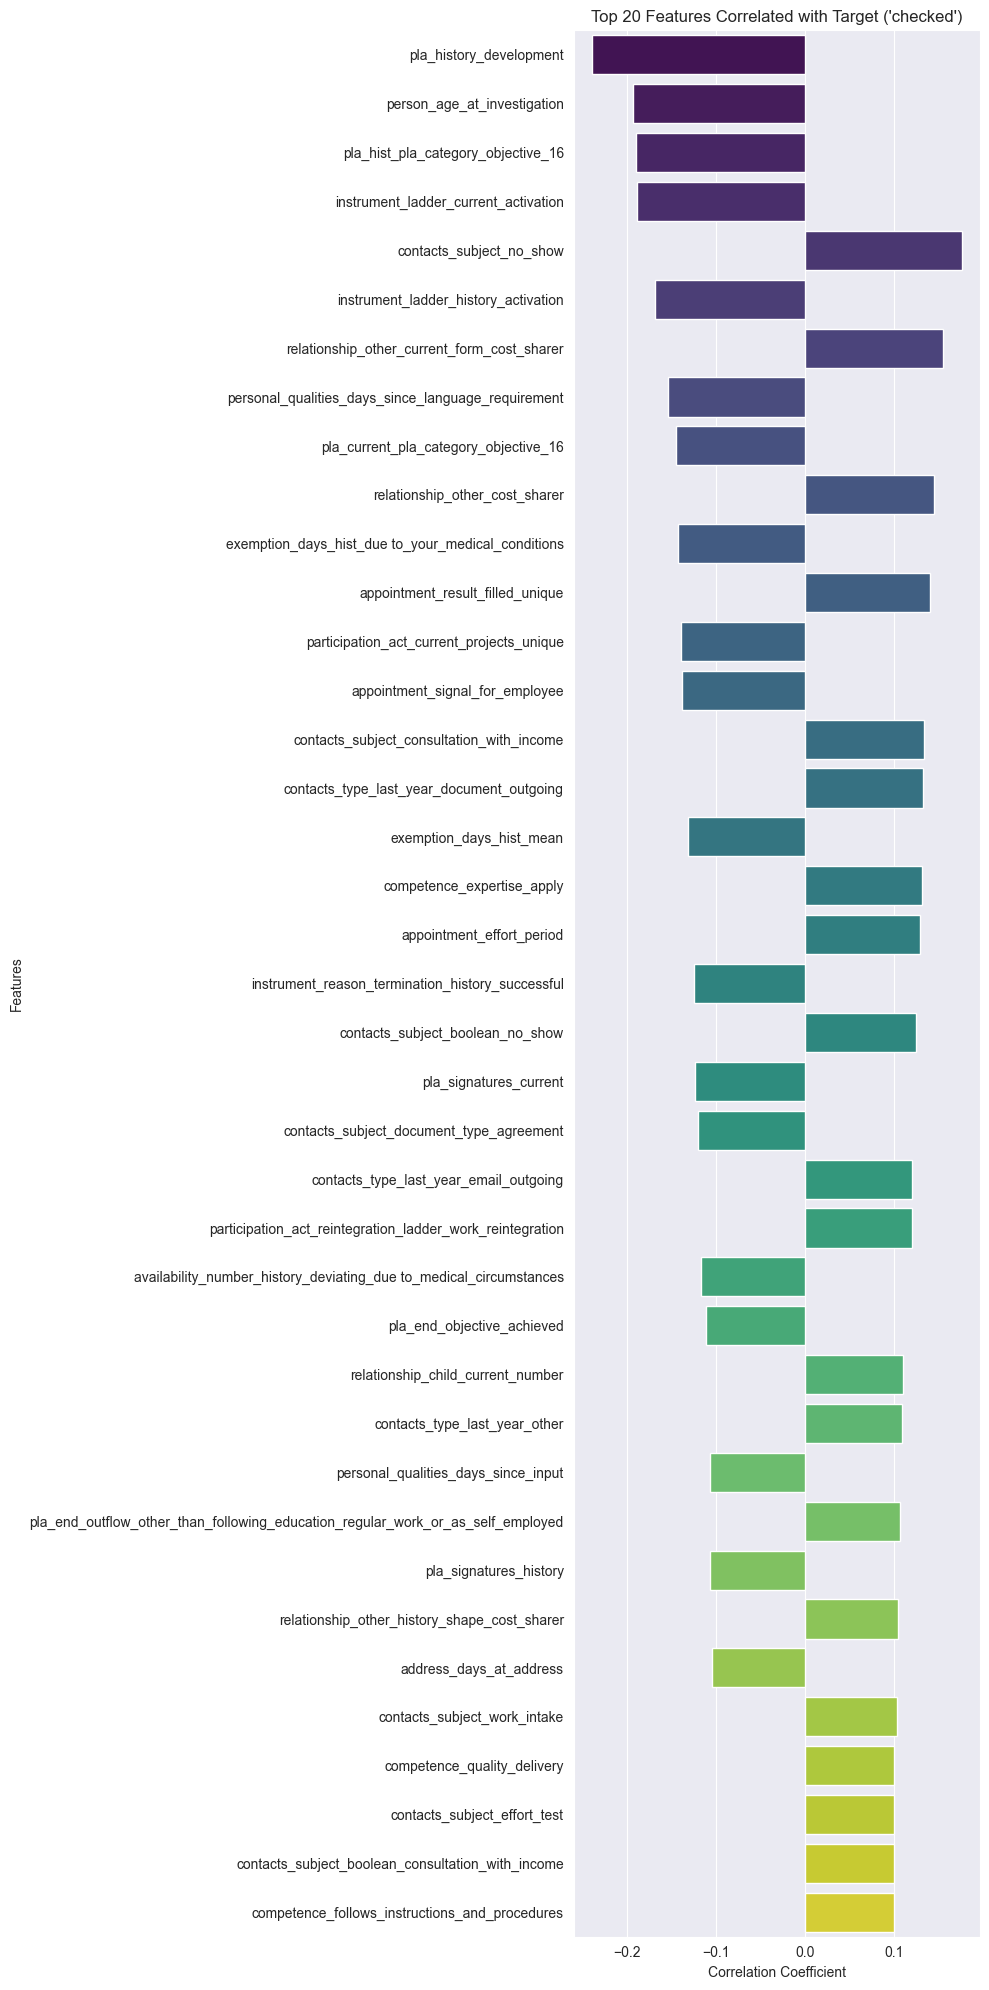

In [52]:
# Define the target column
target_column = 'checked'

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for easier analysis
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Recombine the scaled features with the target column
df_scaled = pd.concat([X_scaled_df, y], axis=1)

# Calculate the correlation matrix on the scaled DataFrame
correlation_matrix = df_scaled.corr()

# Get correlations with the target variable
correlation_with_target = correlation_matrix[target_column].drop(target_column)

# Select the 20 most important features (absolute correlation values)
top_features = correlation_with_target.abs().sort_values(ascending=False).head(50-11)
top_features_names = top_features.index

# Extract correlations for the top features
top_features_correlation = correlation_with_target[top_features_names]

# Plot the correlations
plt.figure(figsize=(10, 20))
sns.barplot(
    x=top_features_correlation.values,
    y=top_features_correlation.index,
    palette="viridis"
)
plt.title("Top 20 Features Correlated with Target ('checked')")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()